In [ ]:
#These examples show how to access the AUTOMATIC1111 API and work both on the
#AI Tools server and the official AUTOMATIC1111 server (https://github.com/AUTOMATIC1111/stable-diffusion-webui)

#For AI Tools specific extensions, check https://github.com/SethRobinson/aitools_server/blob/master/aitools/aitools_extensions_api_tester_jupyter_notebook.ipynb
#note:  Server must be running with --api parm.  Also --listen if it isn't running on the same machine.

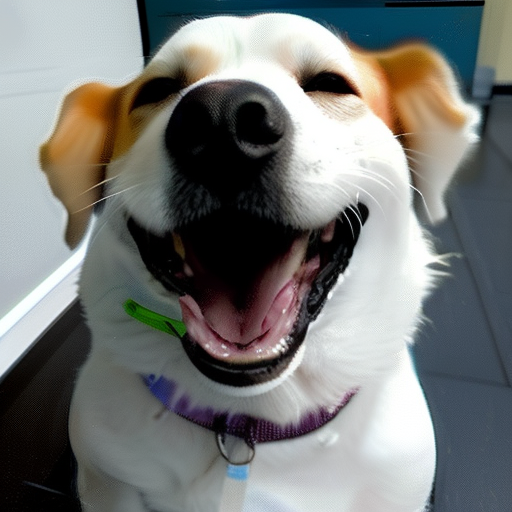

In [5]:
#Simple txt2img API test

import io
import requests
from PIL import Image
import base64
import IPython.display
import json

#For a full list of parms, check http://127.0.0.1:7860/docs#/default/text2imgapi_sdapi_v1_txt2img_post

payload = {
   
        "prompt": "A happy doggo",
        
        #There are tons of optional parms, let's just set the sampler
        "steps": 50,
        "sampler_name": "Euler a"
}

payloadJson = json.dumps( payload)

#print(payloadJson)

resp = requests.post(url="http://127.0.0.1:7860/sdapi/v1/txt2img", data=payloadJson).json()

if resp.get("images") is None:
    #uh oh, something is wrong. Show what it sent us, it's probably an error of some kind
    print("Error, got this returned:")
    print(resp)

else:

    for i in resp['images']:
        img = Image.open(io.BytesIO(base64.b64decode(i)))
        display(img)


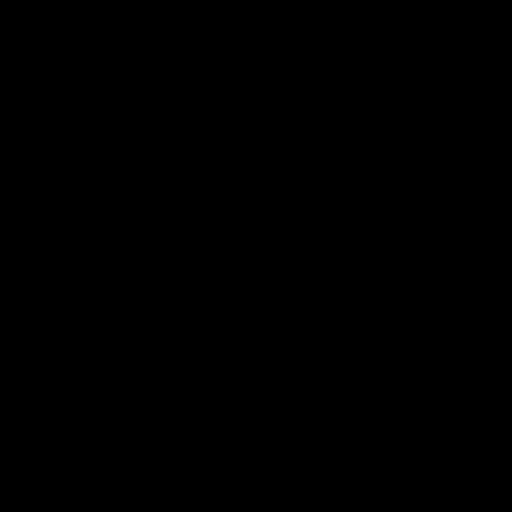

In [58]:
#Same as above, but with NSFW filter (returns black screen if NSFW filter is triggered)
import io
import requests
from PIL import Image
import base64
import IPython.display
import json

#For a full list of parms, check http://127.0.0.1:7860/docs#/default/text2imgapi_sdapi_v1_txt2img_post

payload = {
   
        "prompt": "nude old man",
        "override_settings": {"filter_nsfw": True}
}

#error checking/clarity reduced for brevity
resp = requests.post(url="http://127.0.0.1:7860/sdapi/v1/txt2img", data=json.dumps( payload)).json()

for i in resp['images']:
    img = Image.open(io.BytesIO(base64.b64decode(i)))
    display(img)

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  657k  100  657k  100    41   629k     39  0:00:01  0:00:01 --:--:--  630k


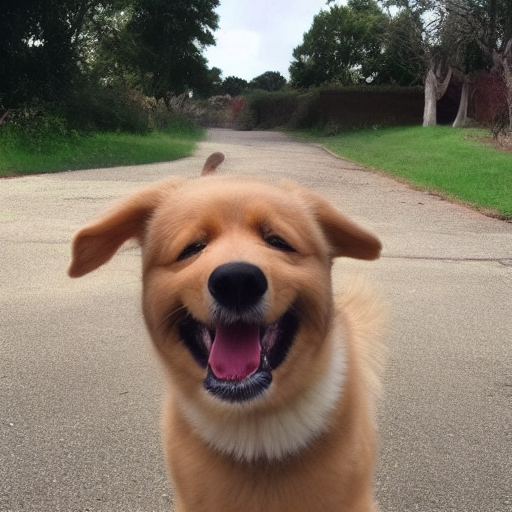

In [8]:
#text2img Example using CURL
import io
from IPython.display import Image
from PIL import Image
import base64
import IPython.display
import json

!curl -X 'POST' \
 'http://glados:7860/sdapi/v1/txt2img' \
  -H 'Content-Type: application/json' \
  -d '{"prompt": "A happy doggo", "steps": 20 }' \
  --output curl_reply.json


#well, we now have the reply (with the image) in the .json file sitting on disk,
#we need to extract the image value and convert it back to png to display it
with open('curl_reply.json', 'r') as f:
    # Load the data from the file
    resp = json.load(f)

    for i in resp['images']:
        img = Image.open(io.BytesIO(base64.b64decode(i)))
        display(img)
    

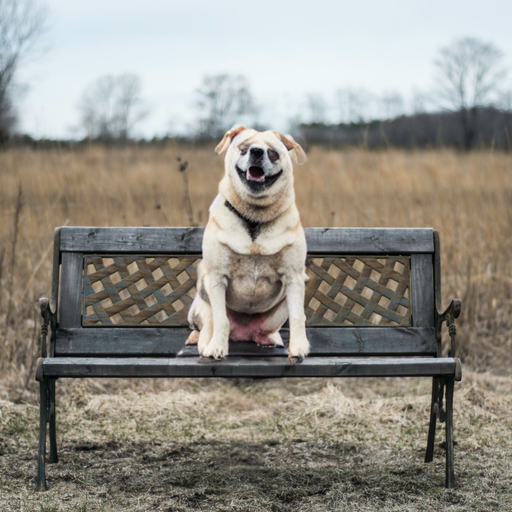

In [62]:
#Simple img2img API test

import io
import requests
from PIL import Image
import base64
import IPython.display
import json

#grab our two files from disk (a pic, and the b&w mask for it) and convert them to text encoding to put them in the json

with open("../aitools/pic.png", 'rb') as open_file:
   pic = str(base64.b64encode(open_file.read()).decode('utf-8'))

#note:  We could opt to just not send a mask at all, if we do that, it will just act upon the entire image.

with open("../aitools/mask.png", 'rb') as open_file:
   mask_pic = str(base64.b64encode(open_file.read()).decode('utf-8'))

payload = {
   
            "prompt": "a happy dog sitting on a bench",
            "init_images": [pic],
             
            #optional below here
            "mask": mask_pic,
            "sampler_name": "DDIM",
            "steps": 50,
            "inpainting_fill": 1, #can be: 0 = fill, 1 = original, 2 = latent noise, 3 = latent nothing
            "denoising_strength": 0.75 #SD 2.1 needs lower, SD 1.5 needs higher, so it kind of depends
}

payloadJson = json.dumps( payload)

#print(payloadJson)

resp = requests.post(url="http://127.0.0.1:7860/sdapi/v1/img2img", data=payloadJson).json()

if resp.get("images") is None:
    #uh oh, something is wrong. Show what it sent us, it's probably an error of some kind
    print("Error, got this returned:")
    print(resp)

else:

    for i in resp['images']:
        img = Image.open(io.BytesIO(base64.b64decode(i)))
        display(img)

In [40]:
#interrogation, ie, getting a textual description of an image
import io
import requests
from PIL import Image
import base64
import IPython.display
import json

#grab an image from disk

with open("../aitools/pic.png", 'rb') as open_file:
   pic = str(base64.b64encode(open_file.read()).decode('utf-8'))

payload = {
   
            "image": pic,
            "model": "clip"
}

payloadJson = json.dumps( payload)

#print(payloadJson)

resp = requests.post(url="http://127.0.0.1:7860/sdapi/v1/interrogate", data=payloadJson).json()

print(resp)

{'caption': 'a dog sitting on a bench in a field of grass and dry grass with a sky background and a field of tall grass with dry grass and dry grass, by George Lambourn'}


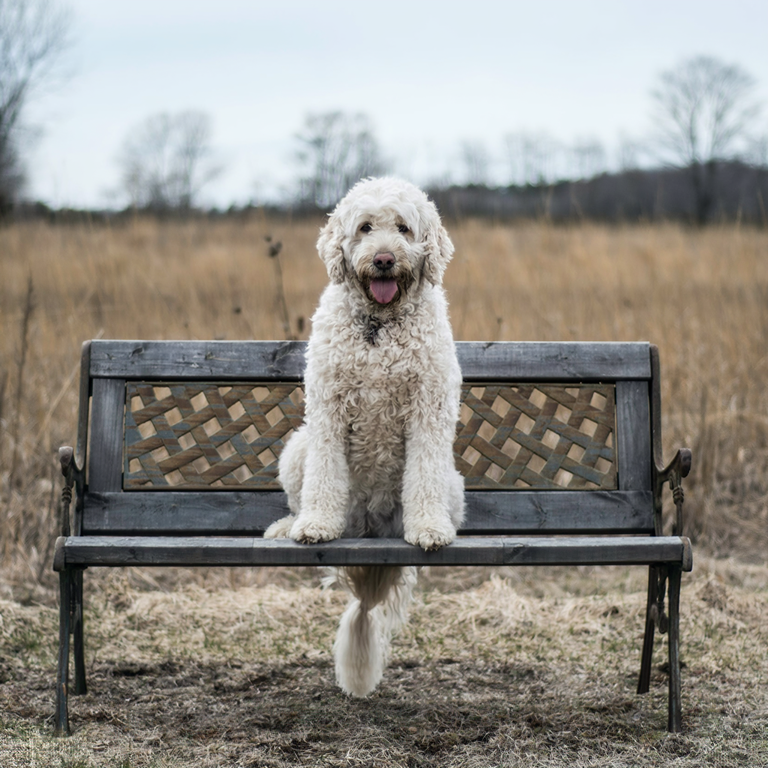

In [54]:
#example of upscaling (exras) (feed in an image, get it back at 2x upscaled or whatever)

import io
import requests
from PIL import Image
import IPython.display
import base64
import json

#grab our two files from disk (a pic, and the b&w mask for it) and convert them to text encoding to put them in the json

with open("../aitools/pic.png", 'rb') as open_file:
   pic = str(base64.b64encode(open_file.read()).decode('utf-8'))

#possible upscaler names to use:  None, Lanczos, LDSR, BSRGAN 4x, ScuNET GAN, ScuNET PSNR, SwinIR 4x, ESRGAN_4x

payload= { 
            "image": pic,

            #optional parms below  
            "upscaling_resize": 1.5,
            "upscaler_1": "ESRGAN_4x",
            "upscaler_2": "SwinIR_4x",
            "extras_upscaler_2_visibility:": 0.5,
            "gfpgan_visibility": 0,
            "codeformer_visibility": 0,
            "codeformer_weight": 0, #0 means max I guess
          
         }

payloadJson = json.dumps( payload)

#print(payloadJson)

resp = requests.post(url="http://glados:7860/sdapi/v1/extra-single-image",data=payloadJson ).json()

#print(resp)

if resp.get("image") is None:
    #uh oh, something is wrong. Show what it sent us, it's probably an error of some kind
    print("Error, got this returned:")
    print(resp)
    
img = Image.open(io.BytesIO(base64.b64decode(resp['image'])))
display(img)